Accuracy: 0.3420720720720721

Confusion Matrix:
 [[1621  935 1198]
 [1528  927 1162]
 [1543  937 1249]]

Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.35      0.43      0.38      3754
Inconclusive       0.33      0.26      0.29      3617
      Normal       0.35      0.33      0.34      3729

    accuracy                           0.34     11100
   macro avg       0.34      0.34      0.34     11100
weighted avg       0.34      0.34      0.34     11100



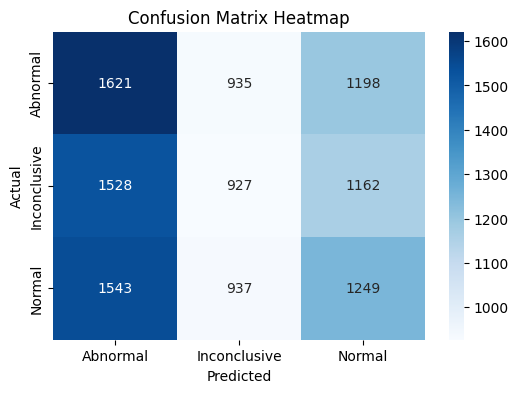

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("healthcare_dataset.csv")

# Drop irrelevant columns
df = df.drop(columns=["Name", "Date of Admission", "Doctor", "Hospital",
                      "Insurance Provider", "Room Number", "Discharge Date"])

# Separate features and target
X = df.drop(columns=["Test Results"])
y = df["Test Results"]

# Encode target labels
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Preprocess: One-Hot Encode categorical features, keep numeric as is
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)],
    remainder="passthrough"
)

X_processed = preprocessor.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()
